# Unsupervised Learning: Trade&Ahead


## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Let's start coding!

### Importing necessary libraries

In [240]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [241]:
## Complete the code to import the data
data = pd.read_csv('stock_data.csv')

In [242]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 340 rows and 15 columns.


In [243]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [244]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [245]:

df = data.copy()

In [246]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [247]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [248]:
df.describe().loc[['mean','50%']].T

,mean,50%
Current Price,8.086234e+01,5.970500e+01
Price Change,4.078194e+00,4.819505e+00
Volatility,1.525976e+00,1.385593e+00
ROE,3.959706e+01,1.500000e+01
Cash Ratio,7.002353e+01,4.700000e+01
Net Cash Flow,5.553762e+07,2.098000e+06
Net Income,1.494385e+09,7.073360e+08
Earnings Per Share,2.776662e+00,2.895000e+00
Estimated Shares Outstanding,5.770283e+08,3.096751e+08
P/E Ratio,3.261256e+01,2.081988e+01


In [249]:
df.describe(include='object').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


### Univariate analysis

In [250]:
# function to plot a boxplot and a histogram along the same scale.

sns.set_theme('talk')
sns.set_style('white')
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="rgb"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    f2.savefig(f'{feature}_hist.png',ppi=200)

**`Current Price`**

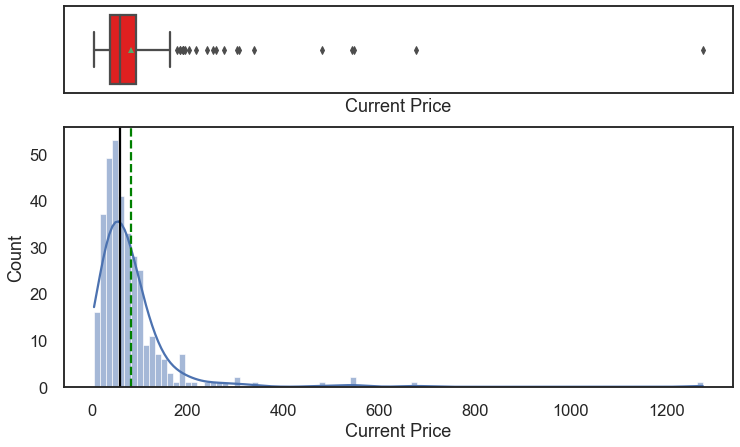

In [251]:
histogram_boxplot(df, 'Current Price',kde=True,bins=100)

In [252]:
np.log(df['Cash Ratio']).isna().any()

False

**`Price Change`**

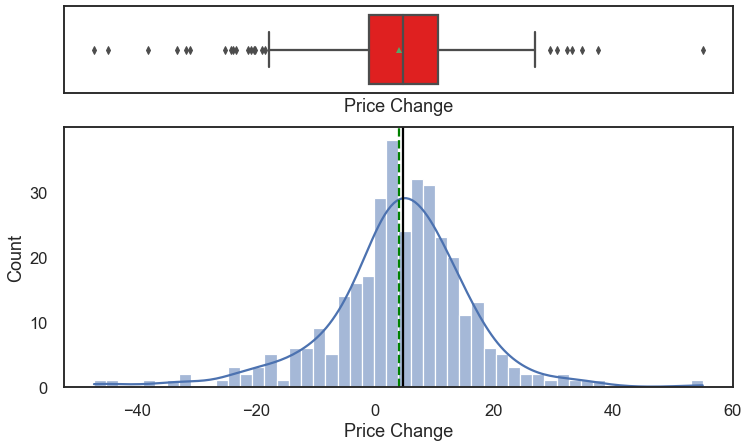

In [253]:
histogram_boxplot(df,'Price Change',kde=True,bins=50)  ## Complete the code to create histogram_boxplot for 'Price Change'

**`Volatility`**

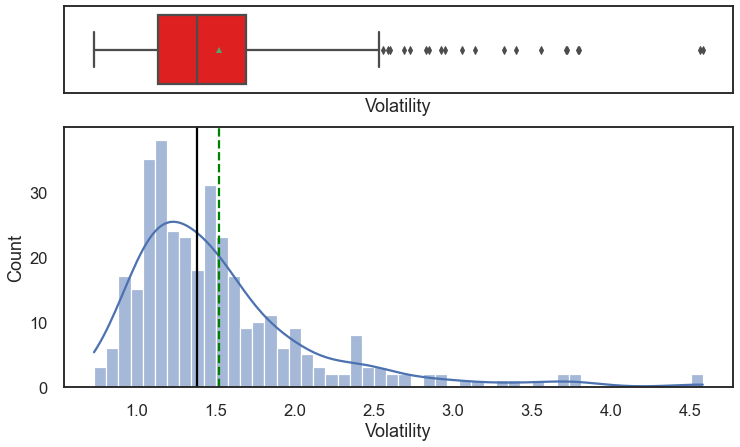

In [254]:
histogram_boxplot(df,'Volatility',kde=True,bins=50)  ## Complete the code to create histogram_boxplot for 'Volatility'

**`ROE`**

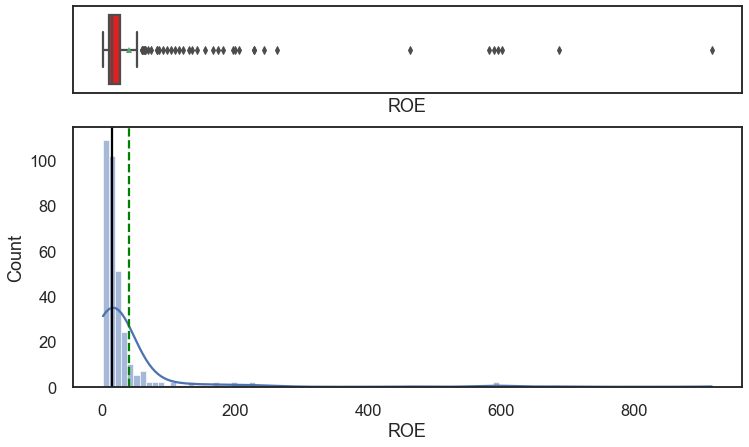

In [255]:
histogram_boxplot(df,'ROE',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'ROE'

**`Cash Ratio`**

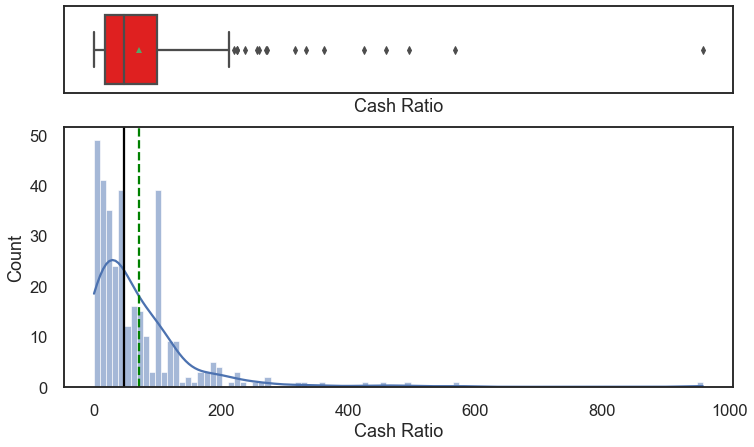

In [256]:
histogram_boxplot(df,'Cash Ratio',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

**`Net Cash Flow`**

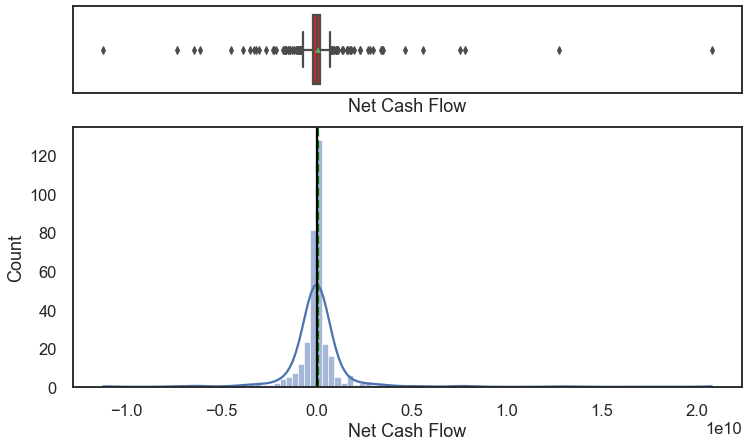

In [257]:
histogram_boxplot(df,'Net Cash Flow',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

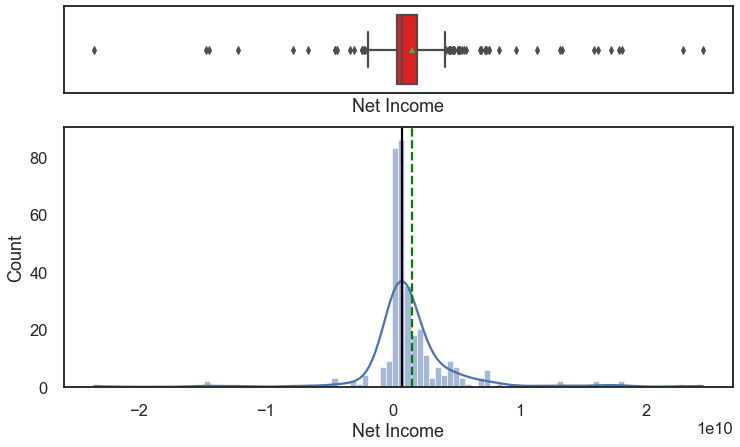

In [258]:
histogram_boxplot(df,'Net Income',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

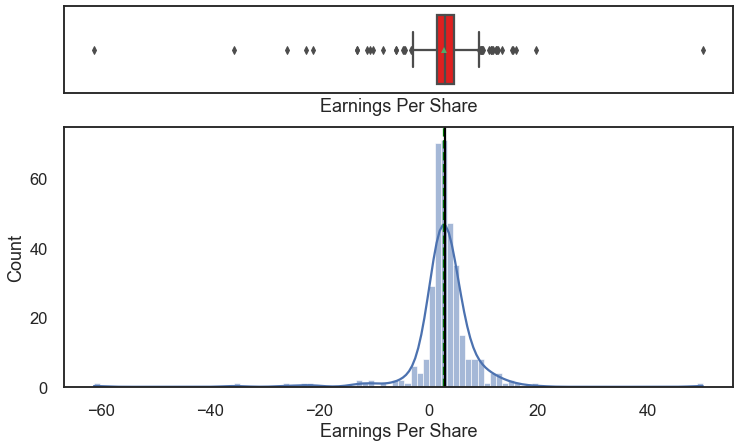

In [259]:
histogram_boxplot(df,'Earnings Per Share',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

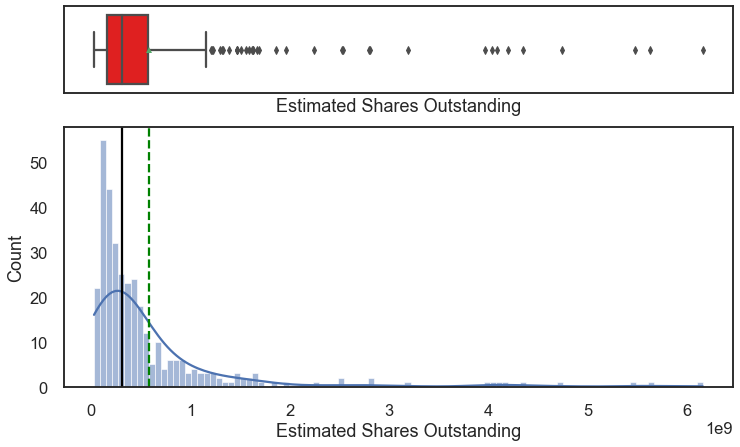

In [260]:
histogram_boxplot(df,'Estimated Shares Outstanding',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

In [ ]:
histogram_boxplot(df,'P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

In [ ]:
histogram_boxplot(df,'P/B Ratio',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

### Observation 
Current price skewed to right becuase of existing a higher vlaues the mean is and the median is .  

The Price change shows normal distribution centred around ??


In [262]:
# function to create labeled barplots

sns.set_theme('talk')
sns.set_style('white')
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().sort_values(ascending=False).index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

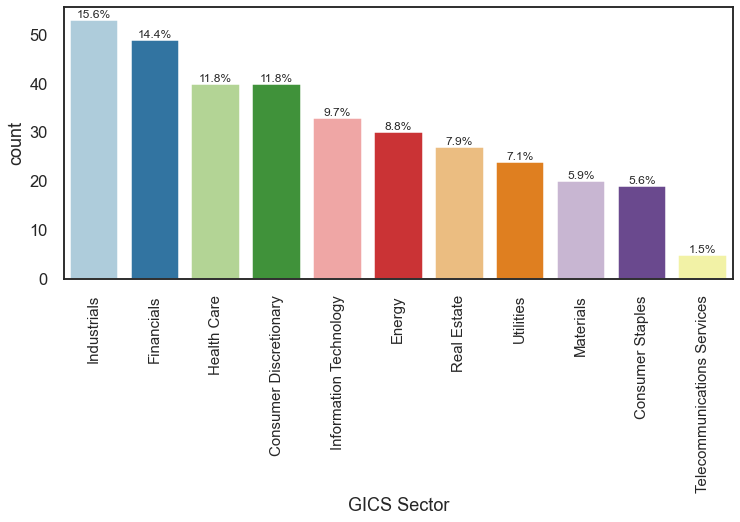

In [263]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

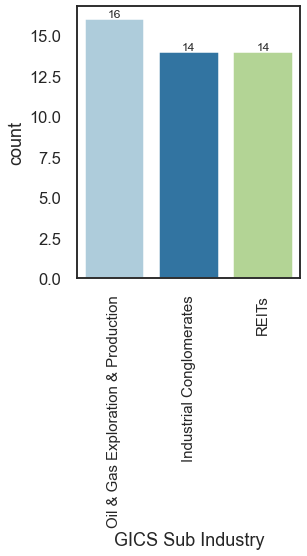

In [264]:
labeled_barplot(df, 'GICS Sub Industry',n=3)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

### Bivariate Analysis

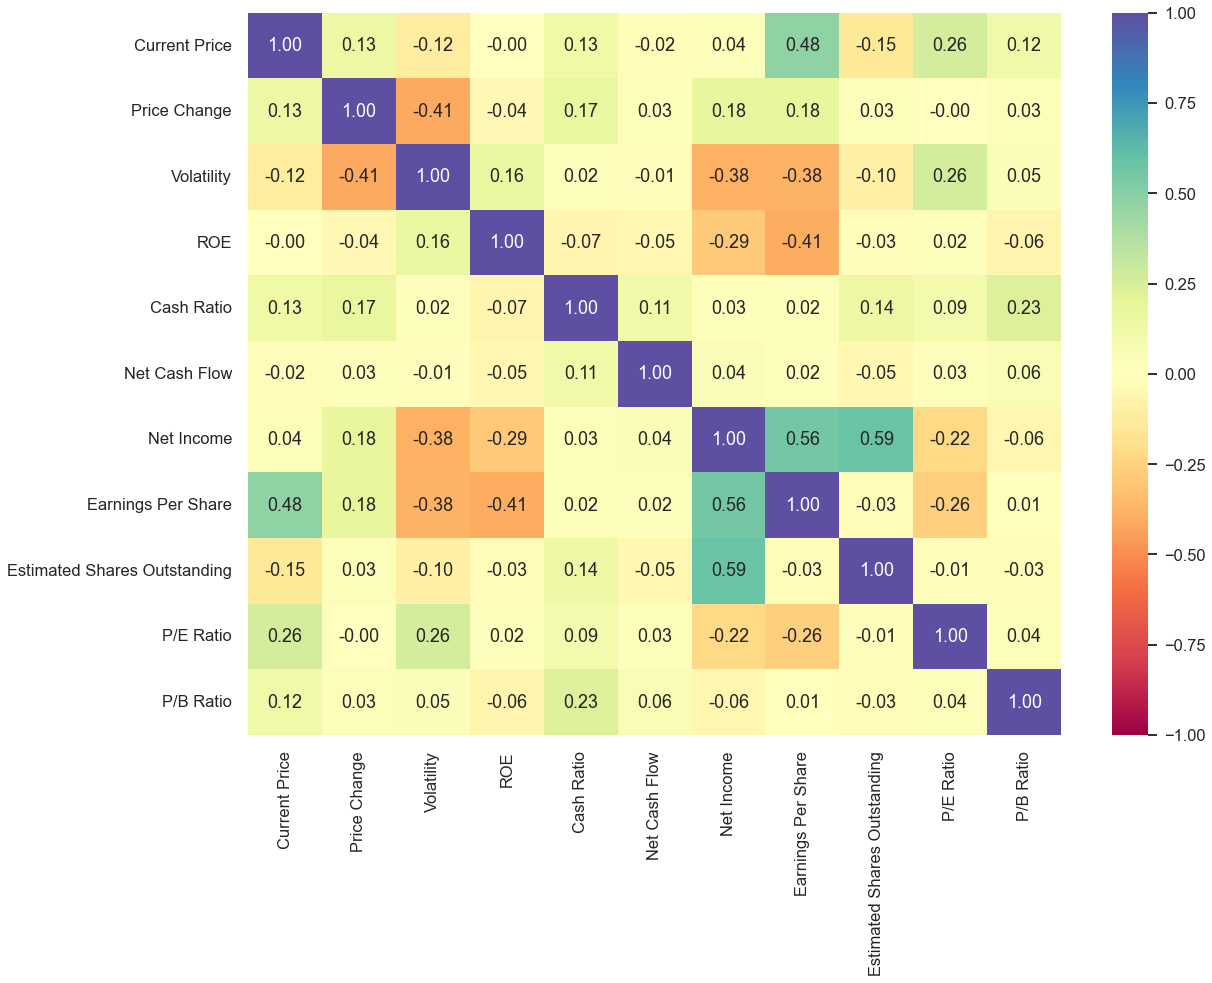

In [265]:
# correlation check
plt.figure(figsize=(18, 14))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

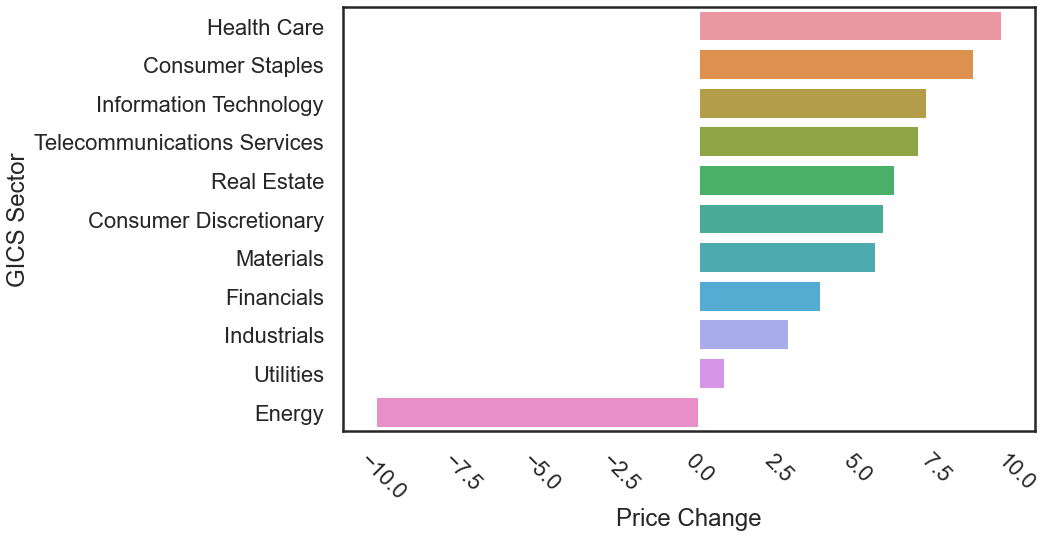

In [266]:
sns.set_context(context='poster',font_scale=1)
plt.figure(figsize=(15,8))
sns.barplot(data=df, y='GICS Sector', x='Price Change', 
            ci=False,
            order=df.groupby(['GICS Sector']).mean()['Price Change'].sort_values(ascending=False).index)  ## Complete the code to choose the right variables
plt.xticks(rotation=-45)
plt.tight_layout()
plt.savefig('GICSSector_PriceChange.png')
plt.show()

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

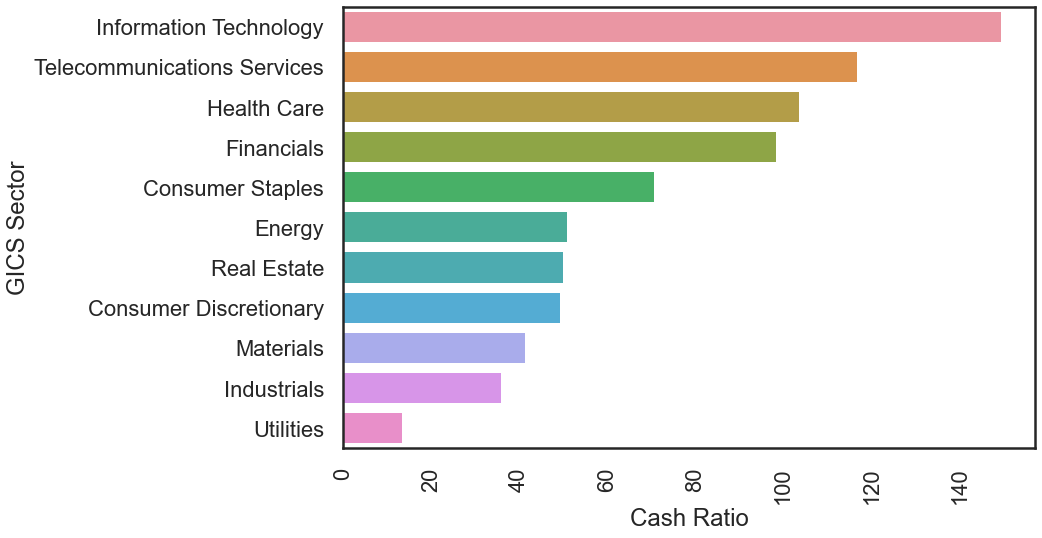

In [267]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, y='GICS Sector', x='Cash Ratio',
            ci=False,order=
df.groupby(['GICS Sector']).mean()['Cash Ratio'].sort_values(ascending=False).index
            )  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('GICSSector_CashRatio.png')
plt.show()

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

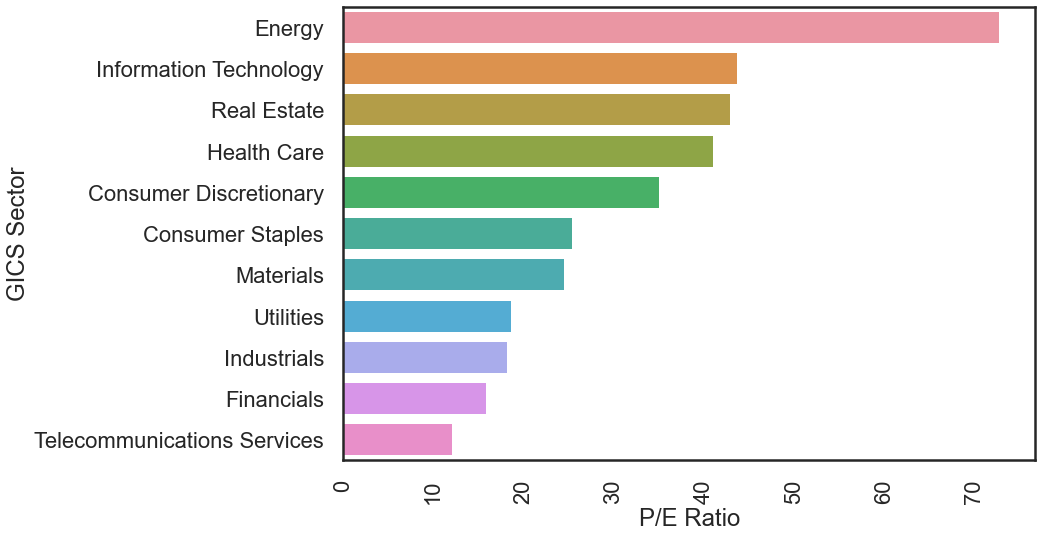

In [268]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, y='GICS Sector', x='P/E Ratio', ci=False,
            order=
df.groupby(['GICS Sector']).mean()['P/E Ratio'].sort_values(ascending=False).index
           
            
            
            
            )  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('GICSSector_PE_Ratio.png')
plt.show()

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

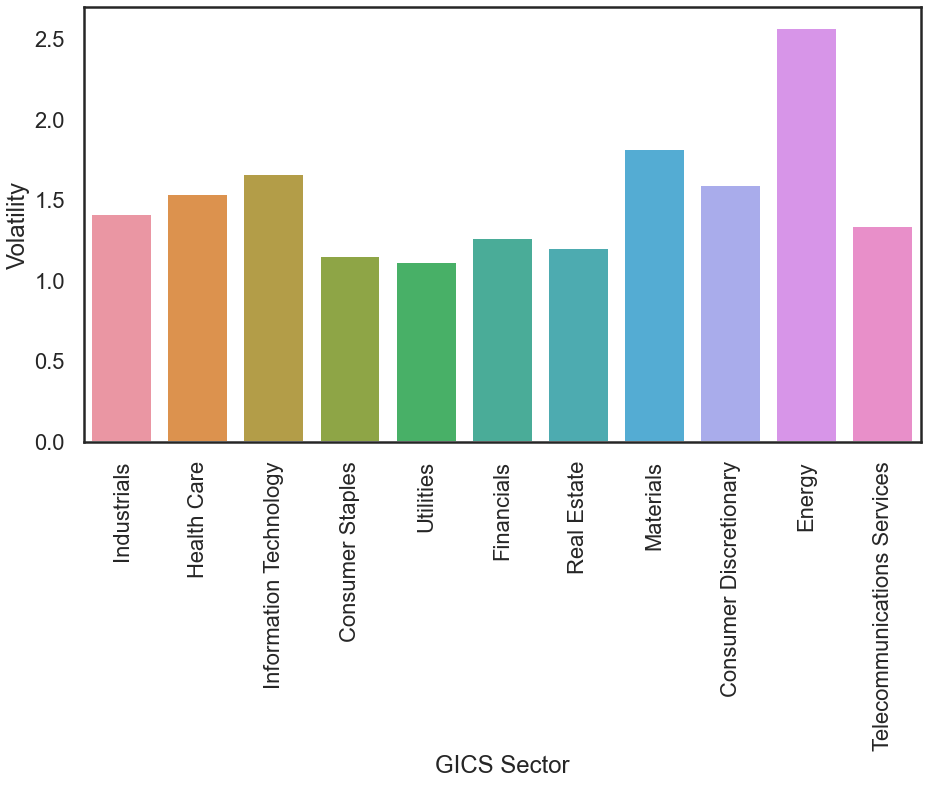

In [269]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

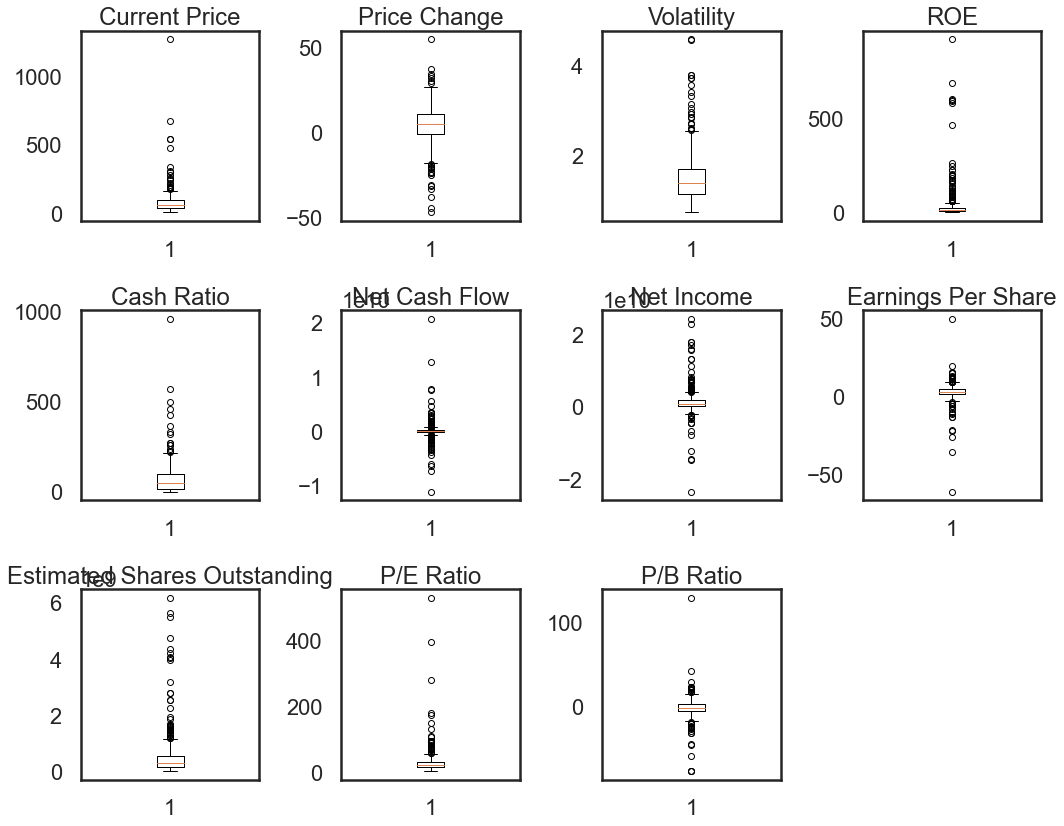

In [270]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.savefig('outliers.png')
plt.show()

In [271]:
df_log=df.copy()
skewed=df.select_dtypes(np.number).skew().sort_values(ascending=False).index[:11]
skewed

Index(['Current Price', 'P/E Ratio', 'ROE', 'Cash Ratio', 'Net Cash Flow',
       'Estimated Shares Outstanding', 'Volatility', 'Net Income', 'P/B Ratio',
       'Price Change', 'Earnings Per Share'],
      dtype='object')

In [272]:
def log_transform(x):
    #print(x)
    return np.log(x+1)
features_to_log=[ 'P/E Ratio','Current Price','ROE','Cash Ratio'
                 ,'Estimated Shares Outstanding',
                 'Volatility']
new_features=[f'log_{i.lower().replace(" ","_")}' for i in features_to_log ]
df_log[new_features]=df_log[features_to_log].applymap(log_transform)
df_log.drop(features_to_log,axis=1,inplace=True)


In [273]:
df_log.describe().T['mean']


Price Change                        4.078194e+00
Net Cash Flow                       5.553762e+07
Net Income                          1.494385e+09
Earnings Per Share                  2.776662e+00
P/B Ratio                          -1.718249e+00
log_p/e_ratio                       3.206044e+00
log_current_price                   4.103651e+00
log_roe                             2.936339e+00
log_cash_ratio                      3.659108e+00
log_estimated_shares_outstanding    1.962222e+01
log_volatility                      9.043023e-01
Name: mean, dtype: float64

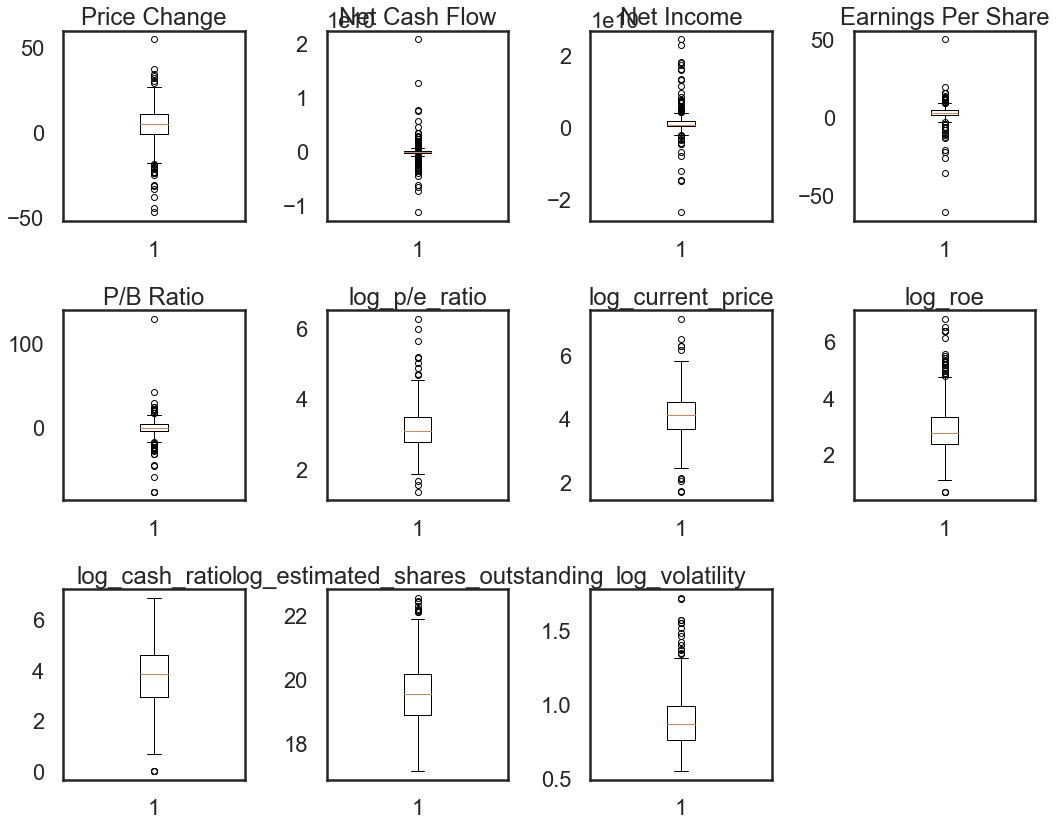

In [274]:
plt.figure(figsize=(15, 12))

numeric_columns = df_log.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df_log[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.savefig('outliers_log.png')
plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [275]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.select_dtypes(np.number)  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [276]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.describe().T['mean']

Current Price                   7.836868e-18
Price Change                   -2.873518e-17
Volatility                     -7.967483e-17
ROE                             2.873518e-17
Cash Ratio                     -8.098097e-17
Net Cash Flow                   2.612289e-18
Net Income                      1.044916e-17
Earnings Per Share              5.747037e-17
Estimated Shares Outstanding   -1.044916e-16
P/E Ratio                       7.836868e-18
P/B Ratio                       2.612289e-17
Name: mean, dtype: float64

In [277]:
subset_scaled_df.isna().sum()

Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

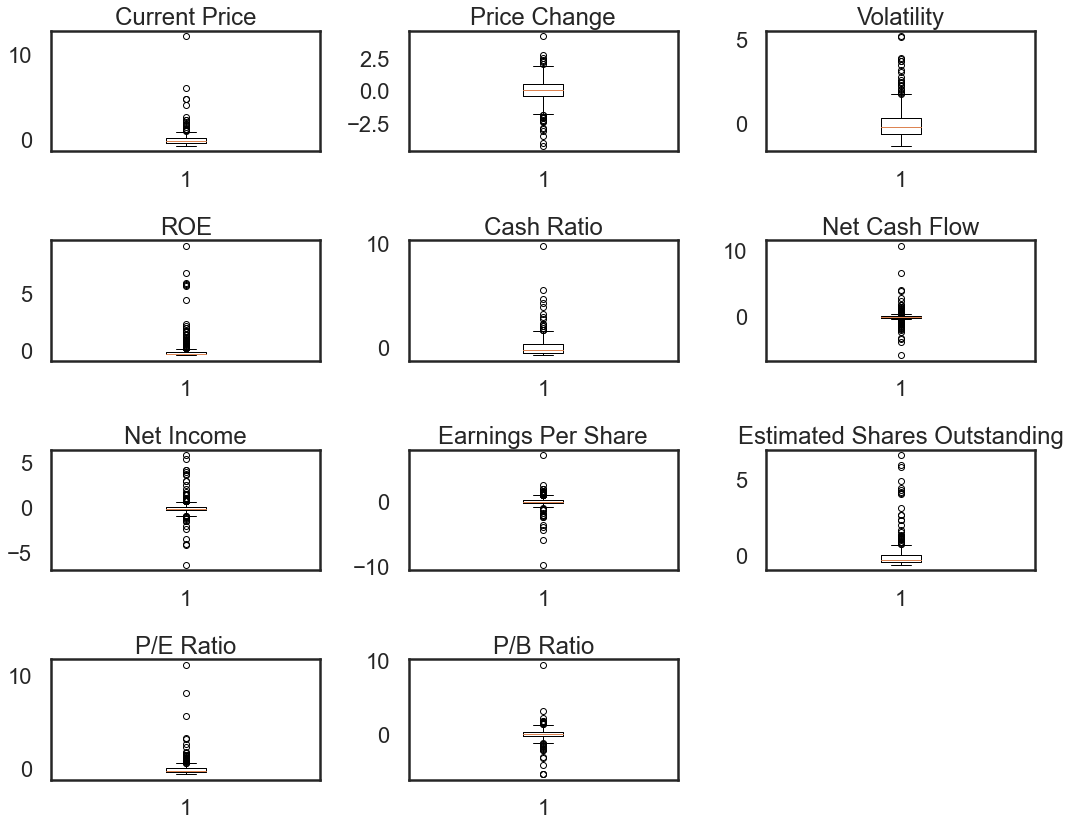

In [278]:
# scaled outliners 
plt.figure(figsize=(15, 12))

numeric_columns = subset_scaled_df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(subset_scaled_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.savefig('outliers_scaled.png')
plt.show()

## K-means Clustering

In [279]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


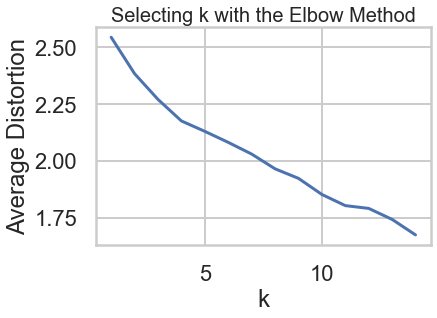

In [280]:
clusters = range(1, 15)
meanDistortions = []
sns.set_style('whitegrid')
for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

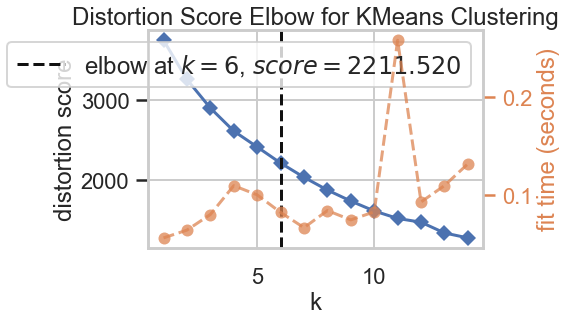

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [281]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


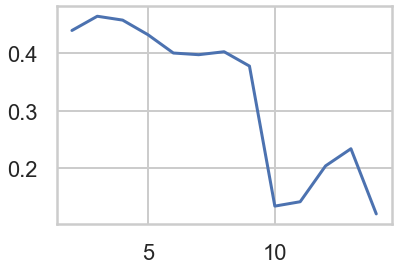

In [282]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

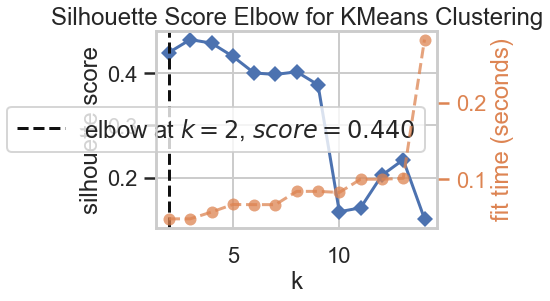

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [283]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
plt.tight_layout()
plt.savefig('silhouette_time.png')
visualizer.show()  # finalize and render figure


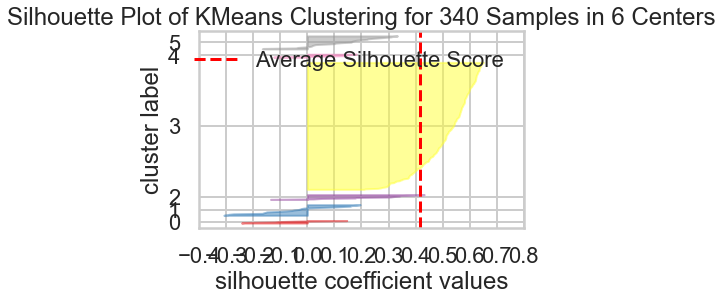

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [309]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
plt.tight_layout()
plt.savefig('Silhouette.png')
visualizer.show()


In [285]:
# final K-means model
kmeans = KMeans(n_clusters=2, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=2, random_state=1)

In [286]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [287]:
km_cluster_profile = df1.groupby(["KM_segments"]).mean()  ## Complete the code to groupby the cluster labels

In [288]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values ## Complete the code to groupby the cluster labels
)

In [289]:
km_cluster_profile.T.style.highlight_max(color="lightgreen", axis=1)

KM_segments,0,1
Current Price,82.786278,62.963940
Price Change,5.649217,-10.537087
Volatility,1.391766,2.774534
ROE,33.781759,93.696970
Cash Ratio,70.159609,68.757576
Net Cash Flow,44922850.162866,154287151.515152
Net Income,1993143179.153095,-3145581545.454545
Earnings Per Share,3.896270,-7.639091
Estimated Shares Outstanding,581977441.138534,530986678.995152
P/E Ratio,24.244484,110.461063


In [313]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == 1]["Security"].unique().tolist())
    

In cluster 0, the following companies are present:
['Analog Devices, Inc.', 'Alexion Pharmaceuticals', 'Amazon.com Inc', 'Apache Corporation', 'Anadarko Petroleum Corp', 'Baker Hughes Inc', 'Chesapeake Energy', 'Cabot Oil & Gas', 'Concho Resources', 'Devon Energy Corp.', 'EOG Resources', 'EQT Corporation', 'Freeport-McMoran Cp & Gld', 'Halliburton Co.', 'Hess Corporation', 'Hewlett Packard Enterprise', 'Kinder Morgan', 'Marathon Oil Corp.', 'Murphy Oil', 'Noble Energy Inc', 'Netflix Inc.', 'Newfield Exploration Co', 'National Oilwell Varco Inc.', 'ONEOK', 'Occidental Petroleum', 'Quanta Services Inc.', 'Range Resources Corp.', 'Spectra Energy Corp.', 'Southwestern Energy', 'Teradata Corp.', 'Williams Cos.', 'Wynn Resorts Ltd', 'Cimarex Energy']
In cluster 1, the following companies are present:
['Analog Devices, Inc.', 'Alexion Pharmaceuticals', 'Amazon.com Inc', 'Apache Corporation', 'Anadarko Petroleum Corp', 'Baker Hughes Inc', 'Chesapeake Energy', 'Cabot Oil & Gas', 'Concho Resourc

In [291]:
km_sec=df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()
km_sec.unstack().T.style.highlight_max(color="lightgreen", axis=1)

KM_segments,0,1
GICS Sector,,
Consumer Discretionary,38.000000,2.000000
Consumer Staples,19.000000,nan
Energy,6.000000,24.000000
Financials,49.000000,nan
Health Care,39.000000,1.000000
Industrials,52.000000,1.000000
Information Technology,29.000000,4.000000
Materials,19.000000,1.000000
Real Estate,27.000000,nan


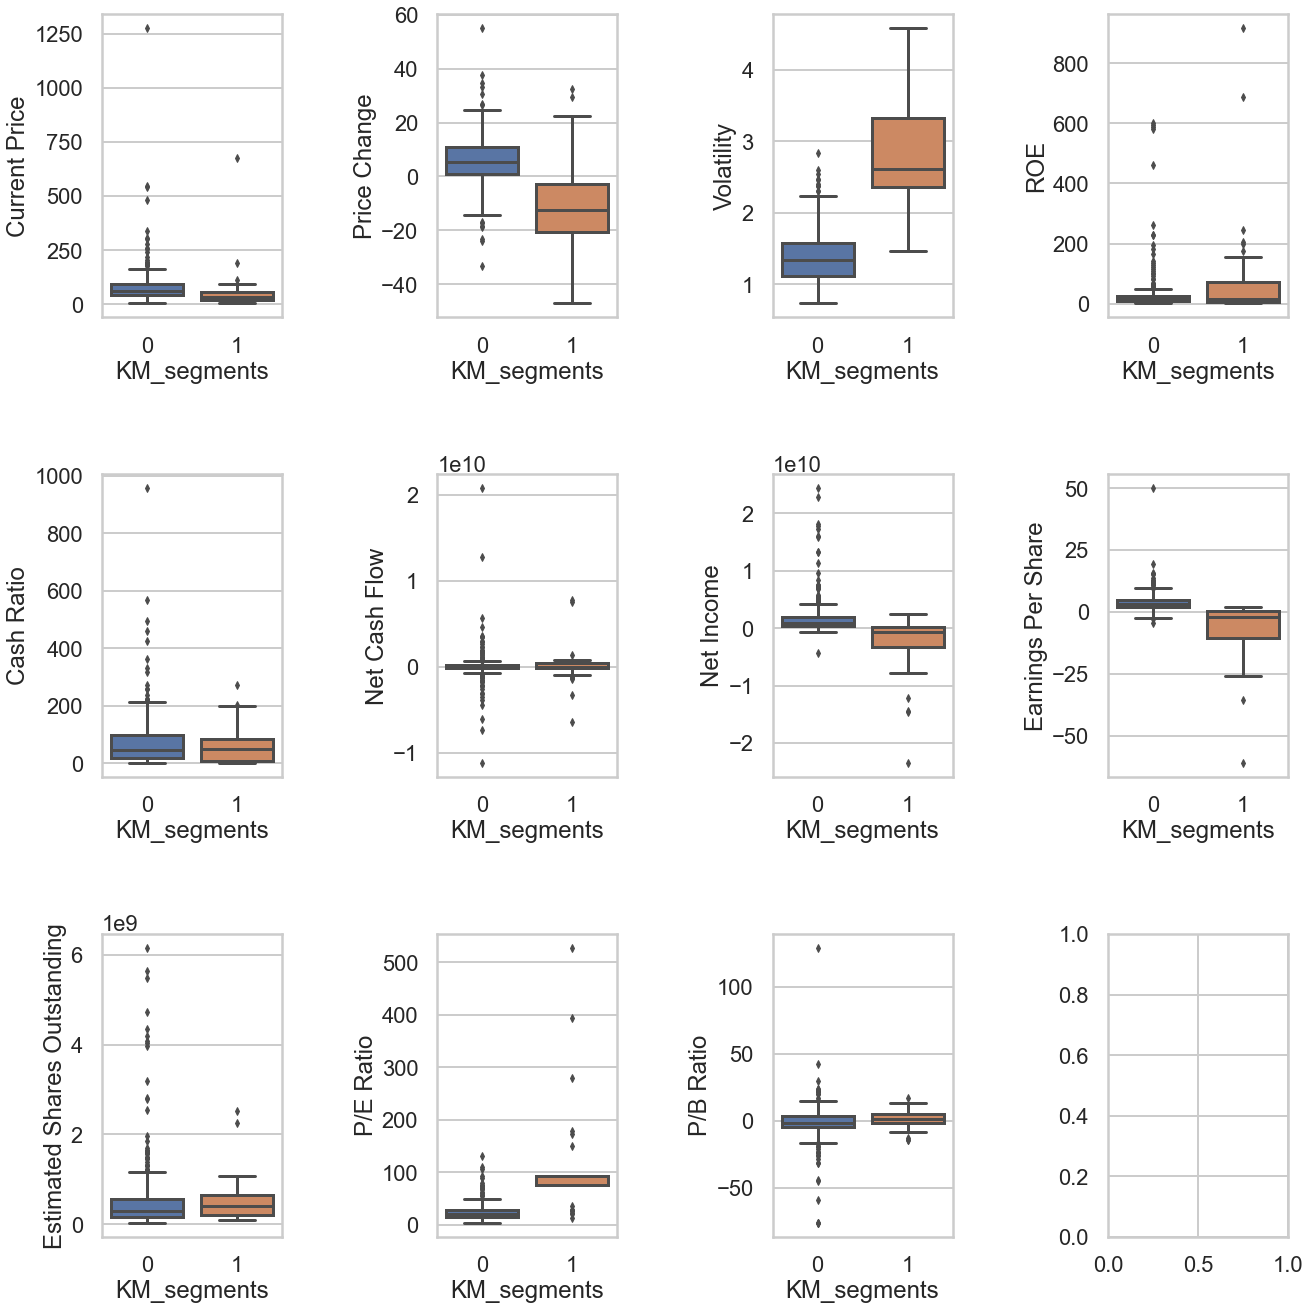

In [292]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)
fig.savefig('boxplot_KM.png')

# Hierarchical Clustering

In [293]:
hc_df = subset_scaled_df.copy()

In [294]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

**Let's explore different linkage methods with Euclidean distance only.**

In [295]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

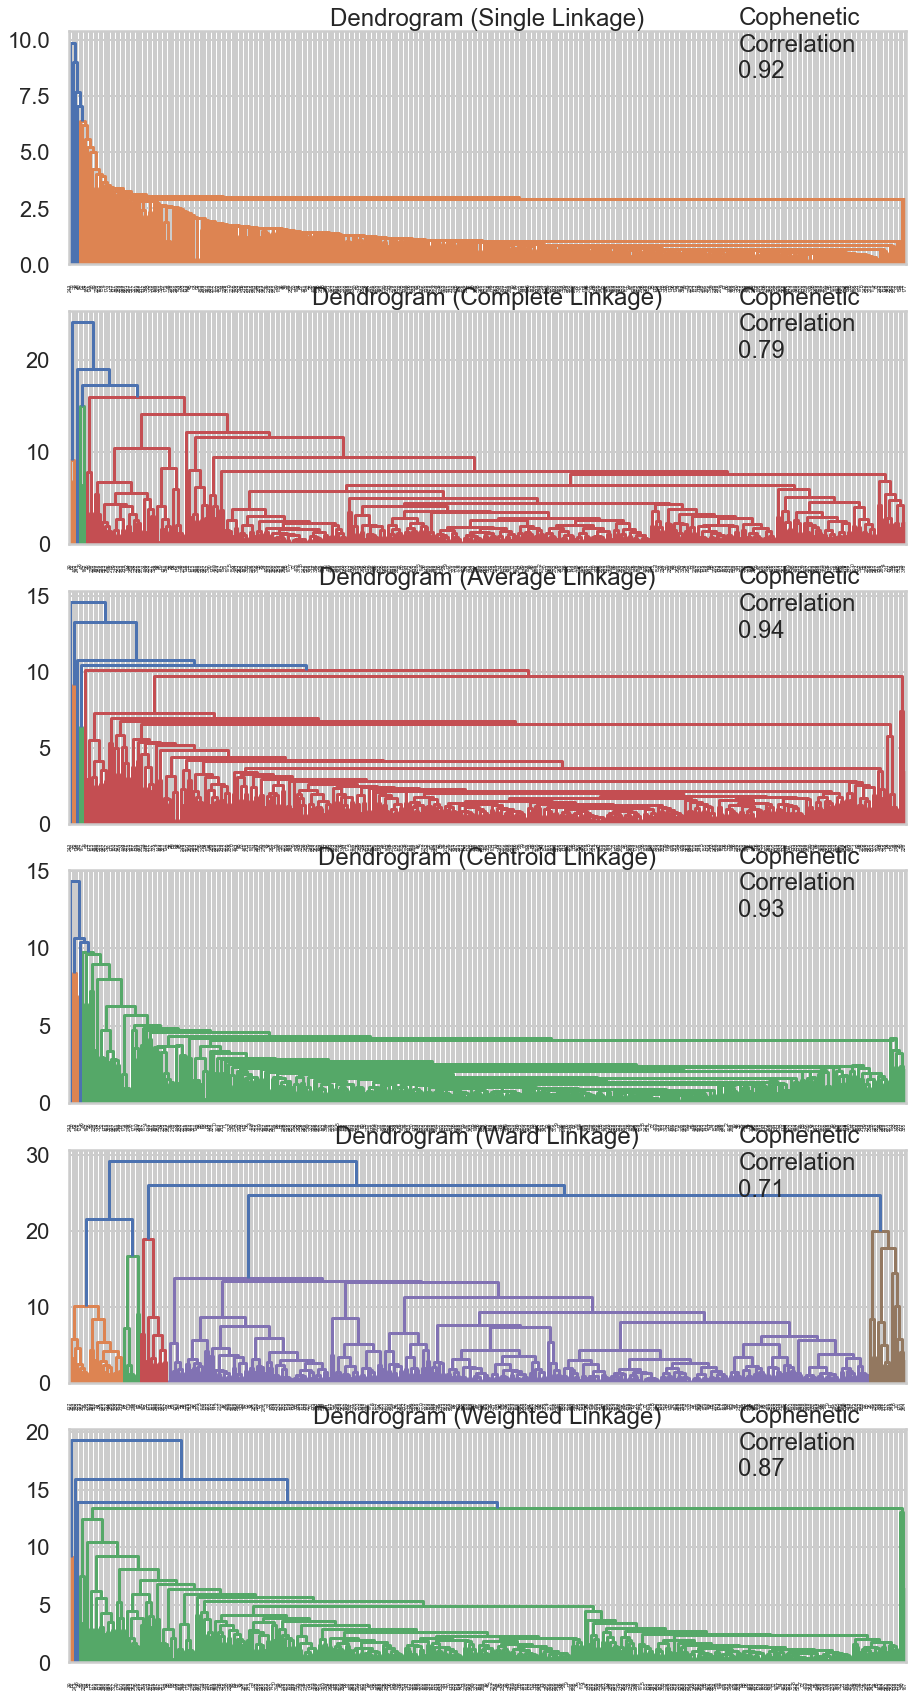

In [296]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    plt.savefig(f'{method}.png')

    compare.append([method, coph_corr])

In [297]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient").reset_index()
df_cc

,index,Linkage,Cophenetic Coefficient
0,4,ward,0.710118
1,1,complete,0.787328
2,5,weighted,0.869378
3,0,single,0.923227
4,3,centroid,0.931401
5,2,average,0.942254


In [298]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage="average")  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [299]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [300]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [301]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [302]:
hc_cluster_profile.T.style.highlight_max(color="lightgreen", axis=1)

HC_segments,0,1,2
Current Price,77.653642,1274.949951,24.485001
Price Change,4.184271,3.190527,-13.351992
Volatility,1.515129,1.268340,3.482611
ROE,35.103858,29.000000,802.000000
Cash Ratio,69.798220,184.000000,51.000000
Net Cash Flow,68662246.290801,-1671386000.000000,-1292500000.000000
Net Income,1613508620.178041,2551360000.000000,-19106500000.000000
Earnings Per Share,2.900905,50.090000,-41.815000
Estimated Shares Outstanding,578930419.447478,50935516.070000,519573983.250000
P/E Ratio,32.466828,25.453183,60.748608


In [303]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [304]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count().unstack().T

HC_segments,0,1,2
GICS Sector,,,
Consumer Discretionary,39.0,1.0,NaN
Consumer Staples,19.0,NaN,NaN
Energy,28.0,NaN,2.0
Financials,49.0,NaN,NaN
Health Care,40.0,NaN,NaN
Industrials,53.0,NaN,NaN
Information Technology,33.0,NaN,NaN
Materials,20.0,NaN,NaN
Real Estate,27.0,NaN,NaN


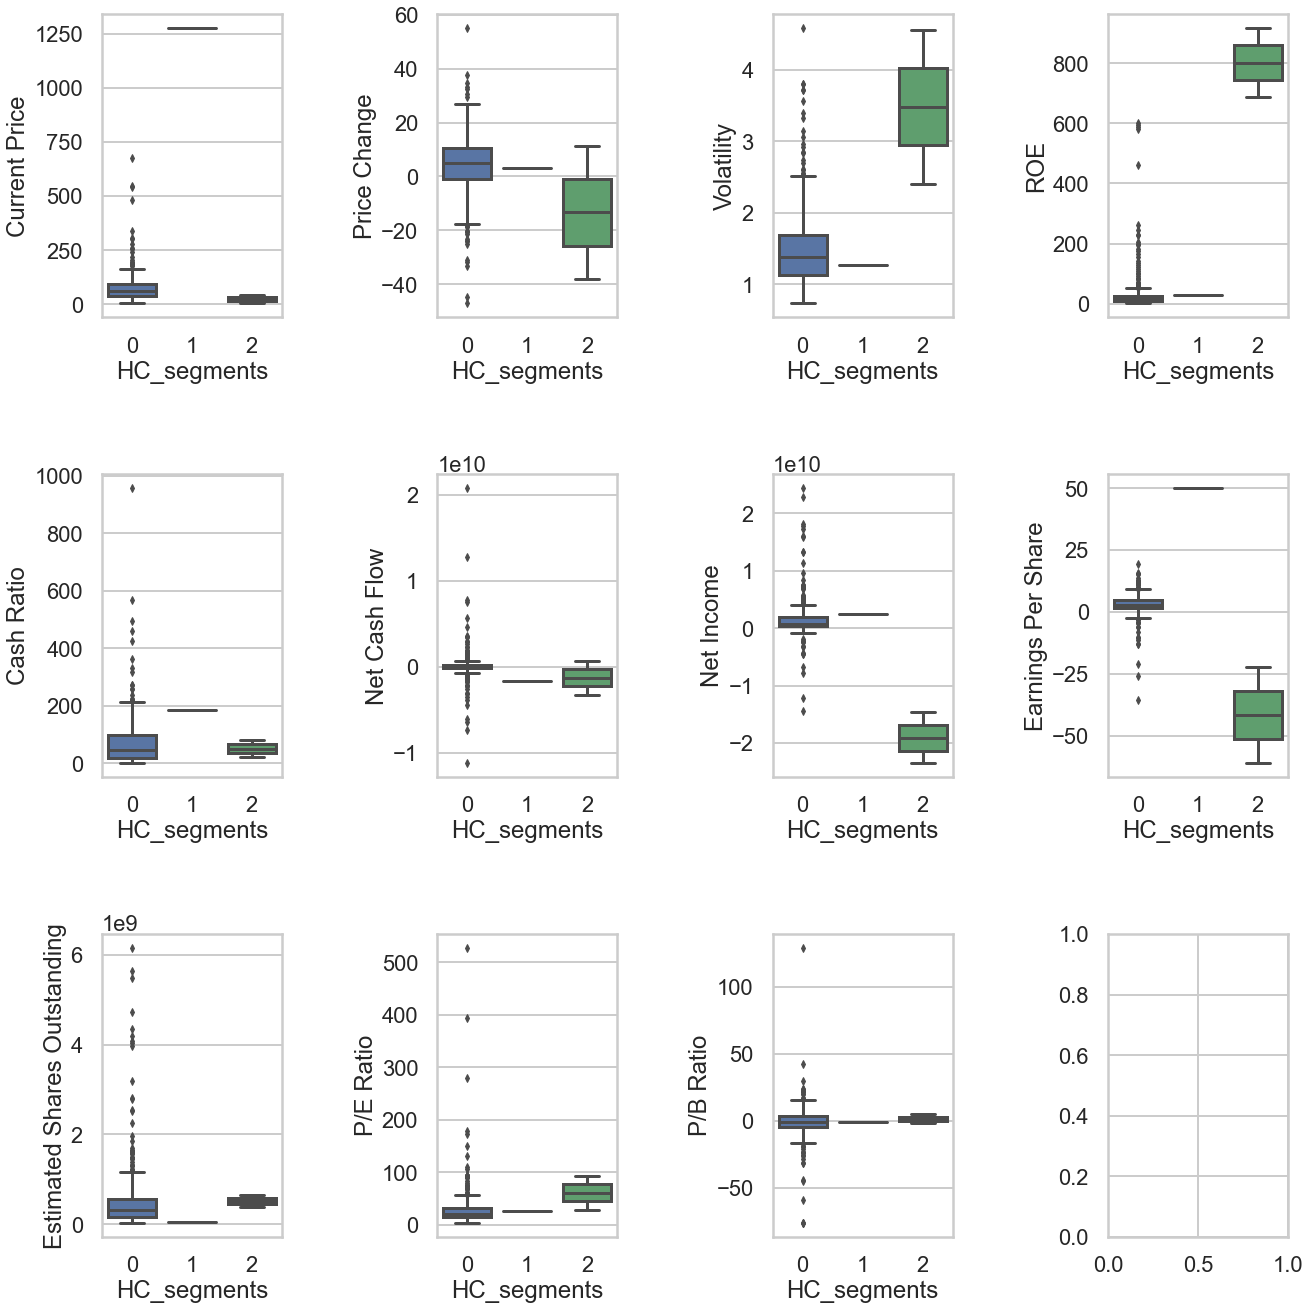

In [305]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)
fig.savefig('Hierarchical.png')

## K-means vs Hierarchical Clustering